In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('C:\\Users\\ADMIN\\Downloads\\global_cancer_mortality_2021.csv')

,Country,Cancer Type,Deaths (2021),% of Total Cancer Deaths,Total Cancer Deaths,Population (2021)
0,Afghanistan,Lung Cancer,67235,31.23,215294,324609715
1,Afghanistan,Colorectal Cancer,66726,30.99,215294,1313958716
2,Afghanistan,Stomach Cancer,7102,3.30,215294,1154090720
3,Afghanistan,Liver Cancer,27641,12.84,215294,244959576
4,Afghanistan,Breast Cancer,33745,15.67,215294,1479384181
...,...,...,...,...,...,...
2890,Zimbabwe,Non-Hodgkin Lymphoma,12962,10.28,126081,856642027
2891,Zimbabwe,Leukemia,20782,16.48,126081,16927403
2892,Zimbabwe,Kidney Cancer,40725,32.30,126081,1094227725
2893,Zimbabwe,Ovarian Cancer,79863,63.34,126081,687678342


In [14]:

# 1. Data Cleaning
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (e.g., fill with median or drop rows)
df.fillna(df.median(numeric_only=True), inplace=True)

# Ensuring consistent column names (e.g., fixing potential typos)
df.columns = df.columns.str.strip().str.replace('Leukamia', 'Leukemia')

Missing Values:
 Country                     0
Cancer Type                 0
Deaths (2021)               0
% of Total Cancer Deaths    0
Total Cancer Deaths         0
Population (2021)           0
dtype: int64


Top 10 countries with highest cancer mortality:
 Country
Sudan          7476195
Indonesia      7436325
Lesotho        7403610
Cameroon       7386390
Morocco        7262895
San Marino     7247280
East Timor     7178160
Haiti          7168035
Gabon          7167660
Netherlands    7070160
Name: Total Cancer Deaths, dtype: int64
Correlation between population and cancer deaths: -0.006393563198983354


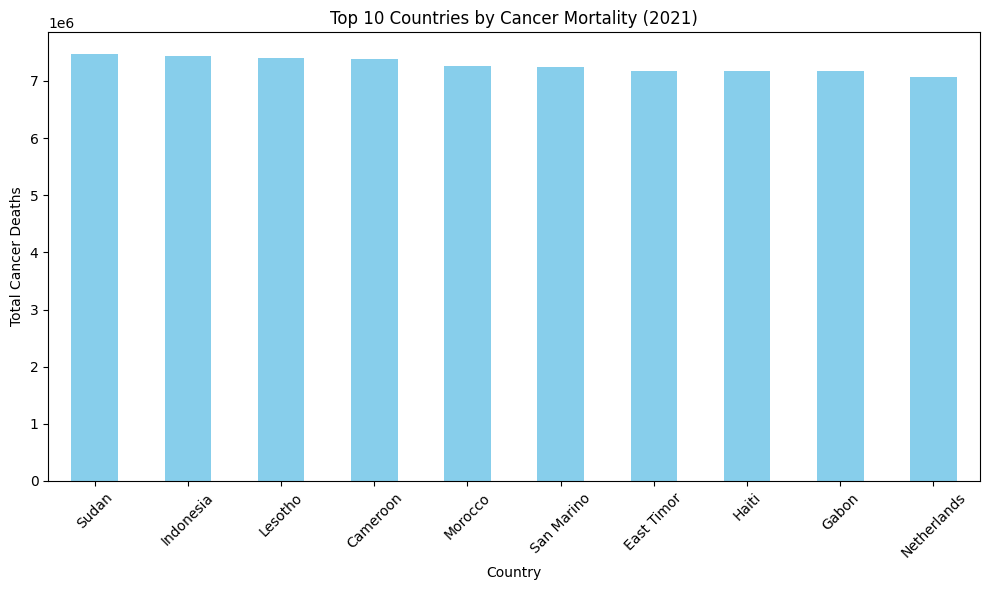

In [26]:
# 2. Exploratory Data Analysis (EDA)
# Top 10 countries by cancer mortality
top_10_countries = df.groupby('Country')['Total Cancer Deaths'].sum().nlargest(10)
print("Top 10 countries with highest cancer mortality:\n", top_10_countries)

# Correlation between population and cancer deaths
correlation = df['Population (2021)'].corr(df['Total Cancer Deaths'])
print(f"Correlation between population and cancer deaths: {correlation}")

# Visualize the top 10 countries with highest cancer deaths
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Cancer Mortality (2021)')
plt.ylabel('Total Cancer Deaths')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_countries_by_cancer_mortality.png')  # Save the figure
plt.show()

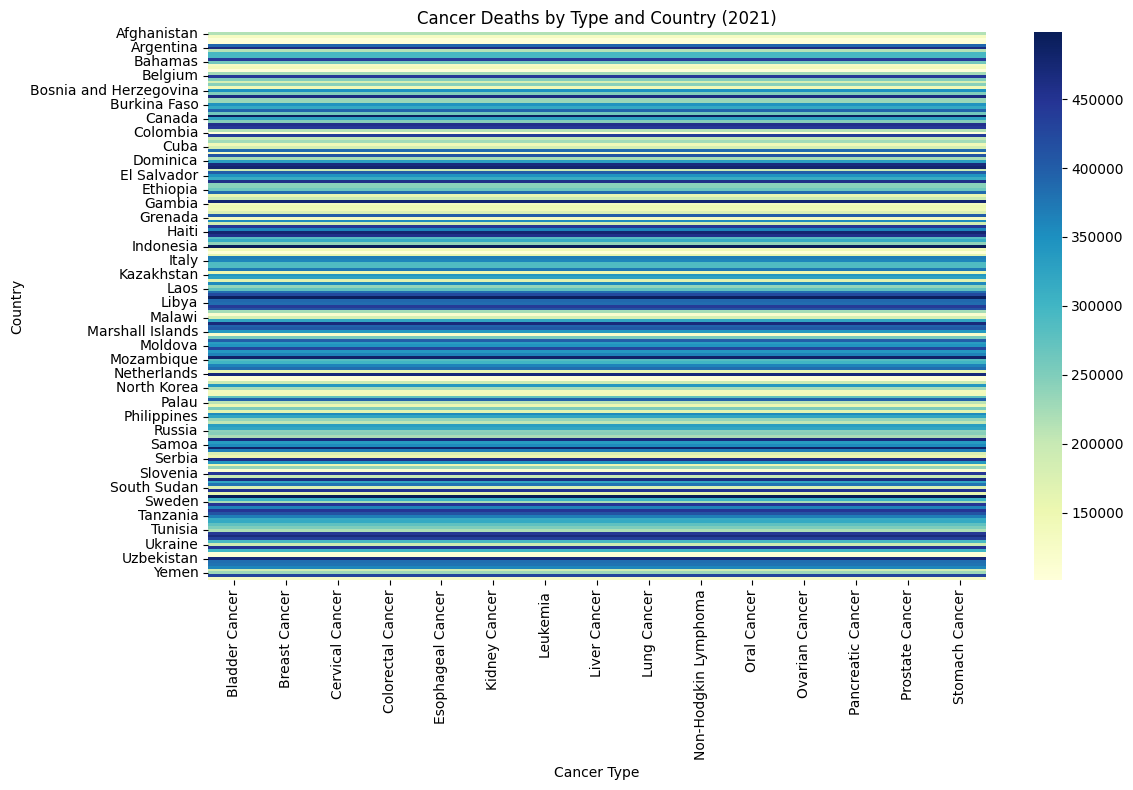

In [22]:
# 3. Visualization of cancer types across countries
plt.figure(figsize=(12, 8))
sns.heatmap(df.pivot_table(index='Country', columns='Cancer Type', values='Total Cancer Deaths'), cmap='YlGnBu')
plt.title('Cancer Deaths by Type and Country (2021)')
plt.xlabel('Cancer Type')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('cancer_deaths_heatmap.png')  # Save the figure
plt.show()

In [23]:
# 4. Insights based on analysis
high_risk_countries = df[df['Total Cancer Deaths'] > 50000]['Country'].unique()
print("High-risk countries (total deaths > 50,000):", high_risk_countries)

# Save the cleaned dataset for further analysis or sharing
df.to_csv('cleaned_cancer_mortality_2021.csv', index=False)

High-risk countries (total deaths > 50,000): ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kir